# Inferring Saturation Intensities from Time Traces

In [8]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
import photo.viz 
colors = photo.viz.plotting_style()

In [11]:
data = pd.read_csv('../../data/experiment_3_traces_tidy.csv')
data = data[data['region']=='activated']
data.head()

,activation_time_s,mean_mcherry_intensity,region,point_idx,power_density_nW,experiment_time_s
25,0,585.523117,activated,1,1.939761,0.0
26,1,1060.880872,activated,1,1.939761,1.0
27,2,1476.282637,activated,1,1.939761,2.0
28,3,1733.119685,activated,1,1.939761,3.0
29,4,1873.397649,activated,1,1.939761,4.0


Text(0, 0.5, 'preactivation intensity')

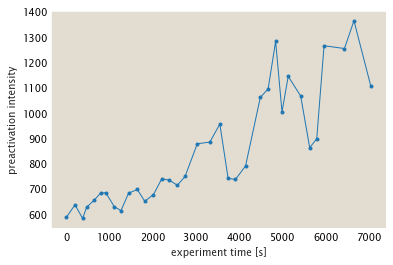

In [12]:
# Plot just the preactivation intensities
preact = data[data['activation_time_s']==0]

fig, ax = plt.subplots(1, 1)
ax.plot(preact['experiment_time_s'], preact['mean_mcherry_intensity'], '-o', ms=3, lw=1)
ax.set_xlabel('experiment time [s]')
ax.set_ylabel('preactivation intensity')





In [13]:
# Load the  inferrentialmodel 
model = photo.bayes.StanModel('../stan/betancourt_gp.stan')
act = data[data['activation_time_s']!=0]
data_dict = {'N':len(preact),
             'x':preact['experiment_time_s'].values,
             'y': preact['mean_mcherry_intensity'].values,
             'N_predict':len(act),
             'x_predict':act['experiment_time_s']}
fit, samples = model.sample(data_dict)

Found precompiled model. Loading...
finished!
Error in atexit._run_exitfuncs:
Traceback (most recent call last):
AssertionError: can only join a child process
  File "/Users/gchure/anaconda3/lib/python3.7/multiprocessing/util.py", line 334, in _exit_function
    p.join()
  File "/Users/gchure/anaconda3/lib/python3.7/multiprocessing/process.py", line 138, in join
    assert self._parent_pid == os.getpid(), 'can only join a child process'


KeyboardInterrupt: 